In [ ]:
#filtered_data je less_generes.csv dataframe

In [ ]:
import kagglehub
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
path = "spotify_data.csv"

In [ ]:
# run if data were not downloaded yet
path = kagglehub.dataset_download("amitanshjoshi/spotify-1million-tracks")

print("Path to dataset files:", path)


path = path + "/spotify_data.csv"

100%|██████████| 77.1M/77.1M [00:01<00:00, 46.1MB/s]

Extracting files...


Path to dataset files: /root/.cache/kagglehub/datasets/amitanshjoshi/spotify-1million-tracks/versions/1


In [ ]:
data = pd.read_csv(path)

# get rid of the index in csv
data = data.loc[:, data.columns != 'Unnamed: 0']

In [ ]:
replace_dict = {
    'black-metal' : 'metal',
    'metalcore' : 'metal',
    'heavy-metal' : 'metal',
    'death-metal' : 'metal',
    'grindcore' : 'metal',

    'rock-n-roll' : 'rock',
    'alt-rock' : 'rock',
    'punk-rock' : 'rock',
    'psych-rock' : 'rock',
    'hard-rock' : 'rock',
    'goth' : 'rock',
    'emo' : 'rock',

    'k-pop' : 'pop',
    'cantopop' : 'pop',
    'power-pop' : 'pop',
    'pop-film' : 'pop',
    'indie-pop' : 'pop',

    'new-age' : 'ambient',
    'sleep' : 'ambient',
    'chill' : 'ambient',

    'dubstep' : 'electro',
    'electronic' : 'electro',
    'edm' : 'electro',
    'detroit-techno' : 'electro',
    'party' : 'electro',
    'dance' : 'electro',
    'techno' : 'electro',
    'garage' : 'electro',
    'disco' : 'electro',
    'trance' : 'electro',
    'hardstyle' : 'electro',
    'drum-and-bass' : 'electro',
    'breakbeat' : 'electro',
    'minimal-techno' : 'electro',
    'dub' : 'electro',
    'hardcore' : 'electro',

    'dancehall' : 'dance',
    'tango' : 'dance',
    'club' : 'dance',
    'salsa' : 'dance',
    'samba' : 'dance',

    'piano' : 'classical',

    'trip-hop' : 'hip-hop',

    'soul' : 'blues',
    'jazz' : 'blues',
    'afrobeat'  : 'blues',
    'ska' : 'blues',

    'guitar' : 'country',
    'acoustic' : 'country',
    'folk' : 'country',
    'sertanejo'  : 'country',

    'gospel' : 'opera',

    'indian' : 'national',
    'spanish' : 'national',
    'french' : 'national',
    'german' : 'national',
    'swedish' : 'national',
    'forro' : 'national',

    'progressive-house' : 'house',
    'chicago-house' : 'house',
    'deep-house' : 'house'
}
filtered_data = data.replace(replace_dict)
remove_list = ['comedy', 'funk', 'groove', 'industrial', 'punk', 'romance', 'sad', 'show-tunes', 'singer-songwriter', 'songwriter']
filtered_data = filtered_data[~filtered_data['genre'].isin(remove_list)]
filtered_data['genre'].unique()

print(filtered_data.shape)
print(data.shape)

(1052157, 19)
(1159764, 19)


In [ ]:
filtered_data.describe() #dobré skôr na rozsah pre kategórie než čokoľvek iné
# Loudness je v mínusových číslach? ale max je v pozitívnych? hmmmmmmm....

,popularity,year,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
count,1.052157e+06,1.052157e+06,1.052157e+06,1.052157e+06,1.052157e+06,1.052157e+06,1.052157e+06,1.052157e+06,1.052157e+06,1.052157e+06,1.052157e+06,1.052157e+06,1.052157e+06,1.052157e+06,1.052157e+06
mean,1.856001e+01,2.011894e+03,5.359890e-01,6.421199e-01,5.293772e+00,-8.962054e+00,6.329559e-01,8.143077e-02,3.118597e-01,2.649301e-01,2.159408e-01,4.539387e-01,1.218579e+02,2.514550e+05,3.892333e+00
std,1.597646e+01,6.817568e+00,1.866380e-01,2.716243e-01,3.556322e+00,5.786679e+00,4.819989e-01,8.492031e-02,3.520635e-01,3.709273e-01,1.920651e-01,2.704285e-01,2.970660e+01,1.528348e+05,4.547174e-01
min,0.000000e+00,2.000000e+03,0.000000e+00,0.000000e+00,0.000000e+00,-5.810000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,2.073000e+03,0.000000e+00
25%,5.000000e+00,2.006000e+03,4.090000e-01,4.580000e-01,2.000000e+00,-1.070700e+01,0.000000e+00,3.700000e-02,5.810000e-03,1.510000e-06,9.740000e-02,2.220000e-01,9.956000e+01,1.822060e+05,4.000000e+00
50%,1.500000e+01,2.012000e+03,5.490000e-01,6.990000e-01,5.000000e+00,-7.372000e+00,1.000000e+00,5.010000e-02,1.340000e-01,2.770000e-03,1.320000e-01,4.350000e-01,1.220950e+02,2.265070e+05,4.000000e+00
75%,2.900000e+01,2.018000e+03,6.790000e-01,8.750000e-01,8.000000e+00,-5.231000e+00,1.000000e+00,8.560000e-02,6.110000e-01,6.690000e-01,2.830000e-01,6.750000e-01,1.399750e+02,2.883410e+05,4.000000e+00
max,1.000000e+02,2.023000e+03,9.930000e-01,1.000000e+00,1.100000e+01,6.172000e+00,1.000000e+00,9.700000e-01,9.960000e-01,1.000000e+00,1.000000e+00,1.000000e+00,2.499930e+02,6.000495e+06,5.000000e+00


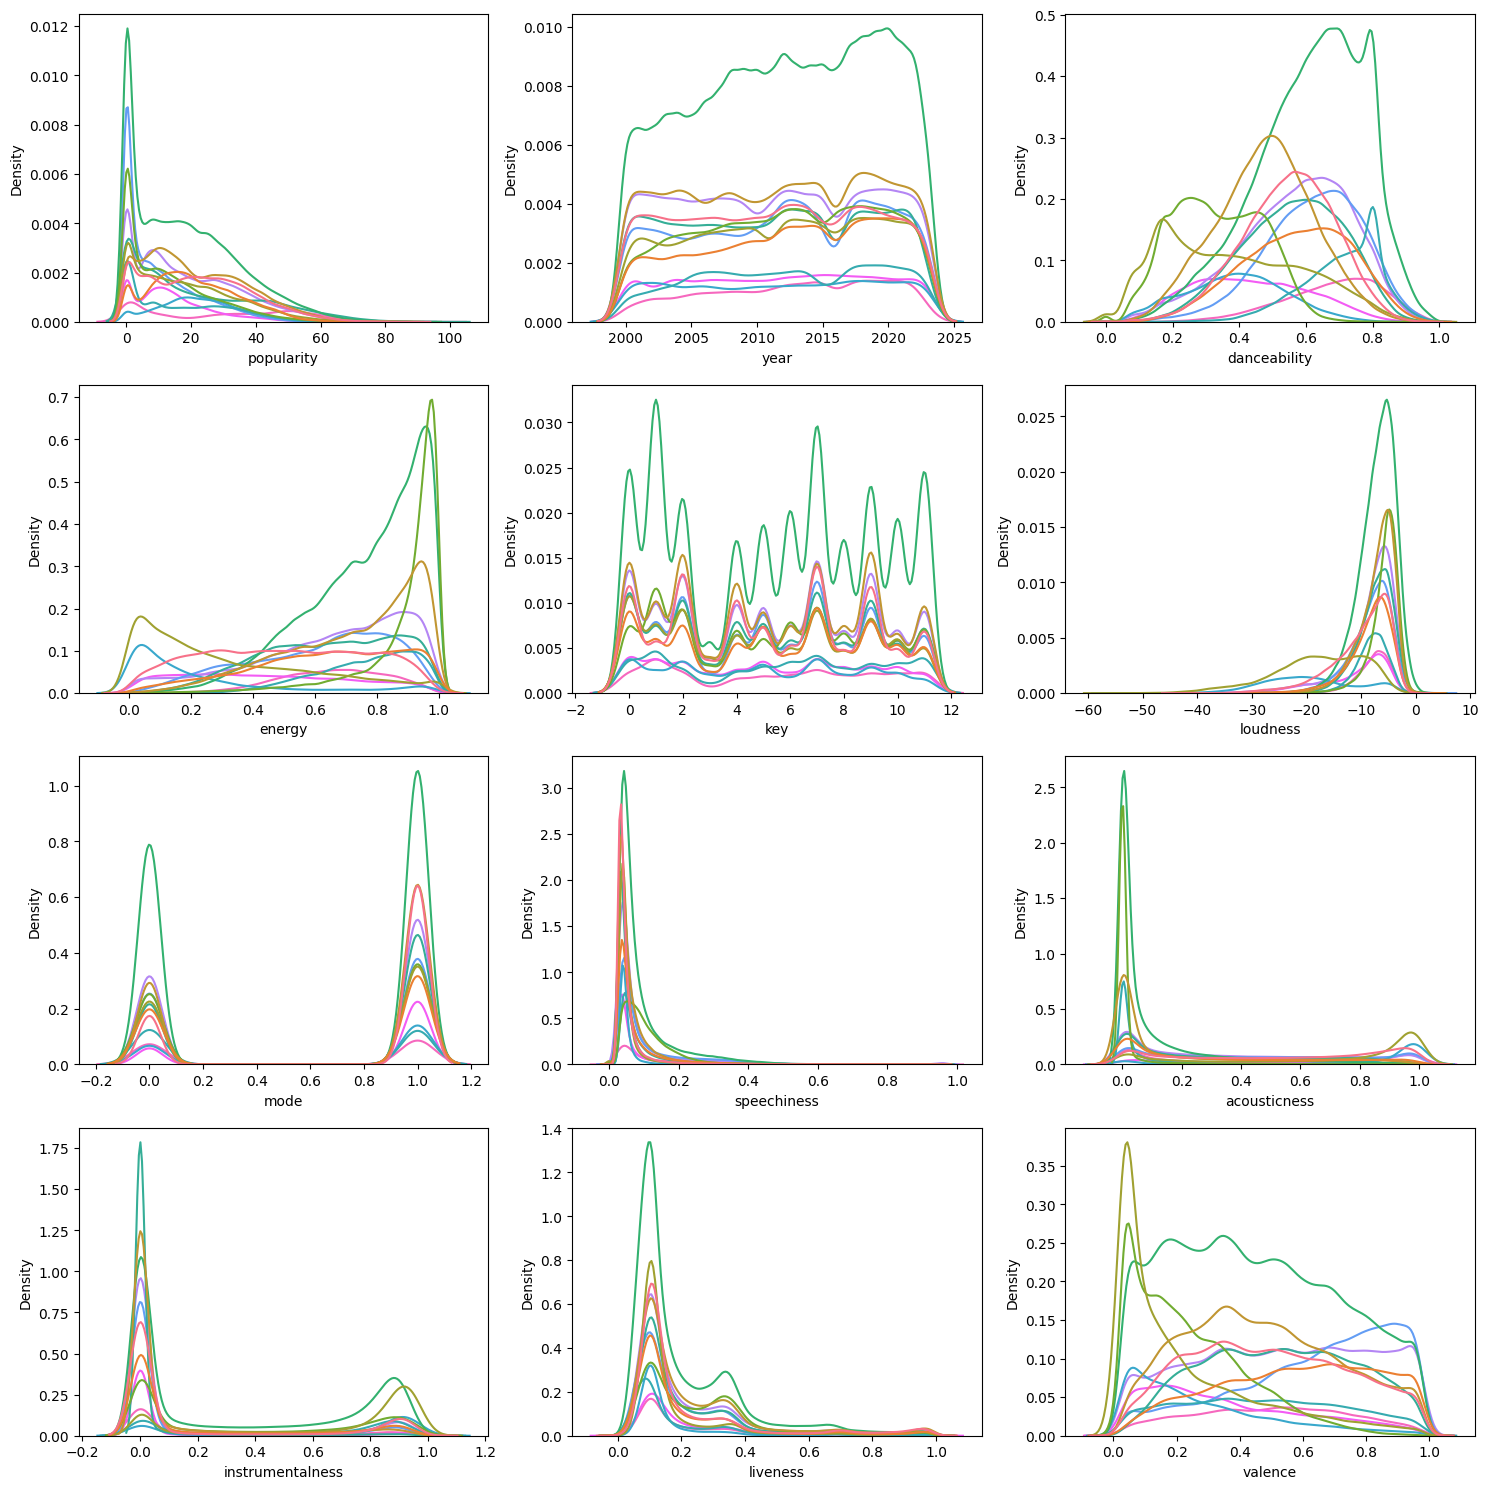

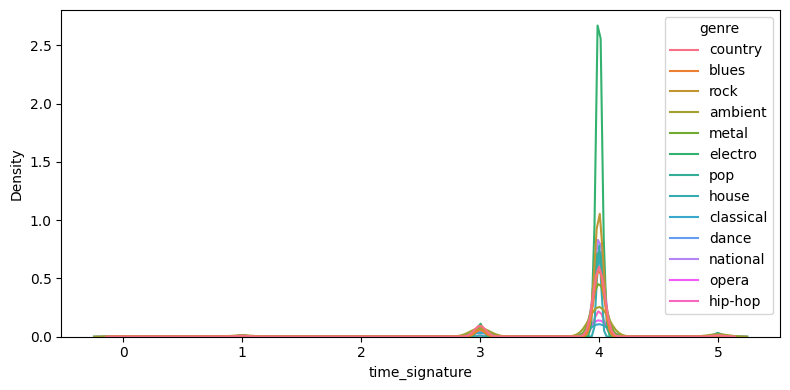

In [ ]:
#just a different view, kde of numeric columns with gender hue, If you preffer this to median histograms (!this is influenced by number of songs in genre!)

numeric_data = pd.concat([ filtered_data.select_dtypes(include=["number"]), filtered_data["genre"] ], axis = 1)
cols = filtered_data.select_dtypes(include=["number"]).columns

fig, axes = plt.subplots(4, 3, figsize=(15, 15))
axes = axes.flatten()
for i in range(12):
    sns.kdeplot(data = numeric_data, x=cols[i], hue="genre", ax=axes[i])
    axes[i].get_legend().set_visible(False)
plt.tight_layout()
plt.show()

fig, ax = plt.subplots(1, 1, figsize=(8, 4))
sns.kdeplot(data = numeric_data, x=cols[-1], hue="genre")#, multiple="stack")
plt.tight_layout()
plt.show()

In [ ]:
###These are statistics about how many songs of one genre have 0 in the respective columns

number_data = pd.concat([filtered_data.select_dtypes(include=["number"]), filtered_data["genre"] ], axis = 1)
num_of_zeroes = (number_data.iloc[:, 1:] == 0)
num_of_zeroes = num_of_zeroes.groupby(number_data["genre"]).sum()
print(num_of_zeroes)
print(())

# just checking for outliers / nulls and common sense errors

           year  danceability  energy    key  loudness   mode  speechiness  \
genre                                                                        
ambient       0           685      23  10362         0  30532          685   
blues         0            14       0   8877         0  27195           14   
classical     0            47       0   4107         0  10388           47   
country       0            27       0  10995         0  19212           27   
dance         0             2       0  10236         0  33986            2   
electro       0            18       0  20381         6  88951           18   
hip-hop       0             3       0   2454         0  12370            3   
house         0             0       0   3778         0  19692            0   
metal         0           304       2   6876         0  34051          304   
national      0            20       0  12405         1  39998           20   
opera         0            21       0   4231         0   7486   

In [ ]:
number_data.groupby("genre").describe()
#IN MY OPINION year, popularity, duration are unneccessary columns
#too much info, ill just take the std / median to predict outliers

popularity                                                      \
               count       mean        std  min   25%   50%   75%    max   
genre                                                                      
ambient      78057.0  18.127253  14.996941  0.0   5.0  16.0  28.0   87.0   
blues        70770.0  21.103151  13.391266  0.0  11.0  19.0  30.0   79.0   
classical    32043.0  22.636239  12.461187  0.0  14.0  22.0  31.0   91.0   
country      89982.0  22.508013  15.979823  0.0   9.0  21.0  34.0   89.0   
dance        84635.0  10.290388  11.462635  0.0   0.0   6.0  17.0   83.0   
electro     207743.0  18.212537  16.134606  0.0   3.0  16.0  29.0   93.0   
hip-hop      26988.0  29.682785  22.790552  0.0   5.0  31.0  50.0   96.0   
house        38888.0  15.966442  15.496550  0.0   1.0  12.0  28.0   82.0   
metal        82548.0  13.031945  13.250571  0.0   1.0  10.0  21.0   84.0   
national    105672.0  18.675515  15.653175  0.0   6.0  15.0  30.0   82.0   
opera        36700.0  14.136131  11.893443  0.0   5.0  12.0  20.0   73.0   
pop          86102.0  21.260261  19.534713  0.0   5.0  15.0  36.0  100.0   
rock        112029.0  21.369003  15.466111  0.0   9.0  18.0  32.0   86.0   

               year               ... duration_ms            time_signature  \
              count         mean  ...         75%        max          count   
genre                             ...                                         
ambient     78057.0  2011.932332  ...   306133.00  6000495.0        78057.0   
blues       70770.0  2012.551971  ...   273918.00  2429560.0        70770.0   
classical   32043.0  2011.682458  ...   291622.50  2619000.0        32043.0   
country     89982.0  2011.424629  ...   247227.00  3886000.0        89982.0   
dance       84635.0  2011.925456  ...   261667.00  3740556.0        84635.0   
electro    207743.0  2012.147711  ...   330733.00  5780846.0       207743.0   
hip-hop     26988.0  2012.645027  ...   282710.25  4711920.0        26988.0   
house       38888.0  2012.414267  ...   425472.50  5504000.0        38888.0   
metal       82548.0  2012.207552  ...   300760.00  4995315.0        82548.0   
national   105672.0  2011.466358  ...   270264.25  4778240.0       105672.0   
opera       36700.0  2011.715204  ...   303693.00  3562946.0        36700.0   
pop         86102.0  2011.414659  ...   270613.00  4739947.0        86102.0   
rock       112029.0  2011.628569  ...   265773.00  4763027.0       112029.0   

                                                        
               mean       std  min  25%  50%  75%  max  
genre                                                   
ambient    3.724355  0.778323  0.0  4.0  4.0  4.0  5.0  
blues      3.904762  0.385557  0.0  4.0  4.0  4.0  5.0  
classical  3.739413  0.657646  0.0  4.0  4.0  4.0  5.0  
country    3.850515  0.469970  0.0  4.0  4.0  4.0  5.0  
dance      3.952975  0.394608  0.0  4.0  4.0  4.0  5.0  
electro    3.961399  0.289554  0.0  4.0  4.0  4.0  5.0  
hip-hop    3.960686  0.337462  0.0  4.0  4.0  4.0  5.0  
house      3.986860  0.152830  1.0  4.0  4.0  4.0  5.0  
metal      3.838882  0.557163  0.0  4.0  4.0  4.0  5.0  
national   3.904166  0.425886  0.0  4.0  4.0  4.0  5.0  
opera      3.773188  0.608128  0.0  4.0  4.0  4.0  5.0  
pop        3.911198  0.378132  0.0  4.0  4.0  4.0  5.0  
rock       3.908434  0.366340  0.0  4.0  4.0  4.0  5.0  

[13 rows x 120 columns]

In [ ]:
#std / value_range
number_data.groupby("genre").std() / ( number_data.groupby("genre").max() - number_data.groupby("genre").min()  )

,popularity,year,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
genre,,,,,,,,,,,,,,,
ambient,0.172379,0.295168,0.211663,0.277053,0.322249,0.139655,0.488011,0.071894,0.363245,0.357214,0.175305,0.224274,0.139021,0.045086,0.155665
blues,0.169510,0.292656,0.162640,0.241353,0.321450,0.086224,0.486426,0.077725,0.320195,0.331562,0.197596,0.247938,0.127465,0.043951,0.077111
classical,0.136936,0.307939,0.171126,0.273034,0.312638,0.153393,0.468078,0.043358,0.324251,0.394583,0.153578,0.226404,0.144581,0.061946,0.131529
country,0.179549,0.297581,0.143550,0.259713,0.315021,0.121188,0.409787,0.051991,0.339999,0.349585,0.214994,0.244546,0.123560,0.022059,0.093994
dance,0.138104,0.299328,0.148974,0.228476,0.320441,0.091490,0.490217,0.114002,0.332403,0.288284,0.195325,0.249068,0.120524,0.023958,0.078922
electro,0.173490,0.291707,0.163734,0.186376,0.330326,0.081487,0.494816,0.091992,0.186339,0.383426,0.177773,0.261288,0.103565,0.025495,0.057911
hip-hop,0.237402,0.280759,0.149062,0.170975,0.333985,0.104453,0.498272,0.140412,0.224766,0.332937,0.171003,0.242627,0.134175,0.021354,0.067492
house,0.188982,0.288532,0.131115,0.164907,0.331921,0.100440,0.499966,0.060652,0.104152,0.379455,0.165639,0.261646,0.053773,0.034585,0.038208
metal,0.157745,0.285059,0.141580,0.143996,0.320137,0.061361,0.492287,0.075697,0.110229,0.379239,0.192638,0.184357,0.134307,0.027676,0.111433


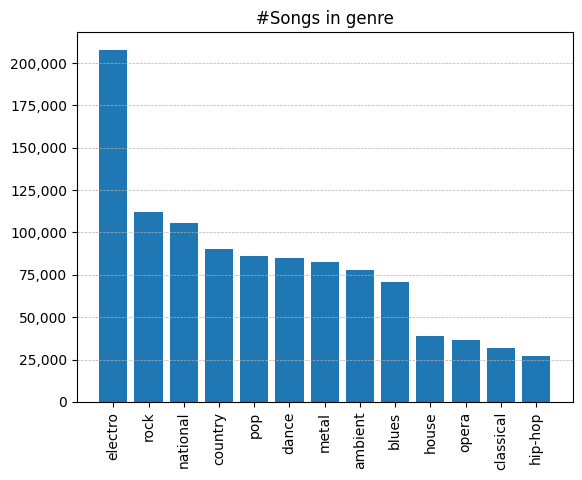

In [ ]:
genre_counts = filtered_data['genre'].value_counts()

plt.bar(genre_counts.index, genre_counts.values)
plt.xticks(rotation=90)
###stolen code below
plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'{x:,.0f}'))
###stolen code above


plt.grid(True, which='major', axis='y', linestyle='--', linewidth=0.5)
plt.title('#Songs in genre')
plt.show()

<ipython-input-10-fea099457aac>:11: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[i].set_xticklabels(axes[i].get_xticklabels(), rotation=90)
<ipython-input-10-fea099457aac>:11: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[i].set_xticklabels(axes[i].get_xticklabels(), rotation=90)
<ipython-input-10-fea099457aac>:11: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[i].set_xticklabels(axes[i].get_xticklabels(), rotation=90)
<ipython-input-10-fea099457aac>:11: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[i].set_xticklabels(axes[i].get_xticklabels(), rotation=90)
<ipython-input-10-fea099457aac>:11: UserWarning: set_ticklabels() should only be

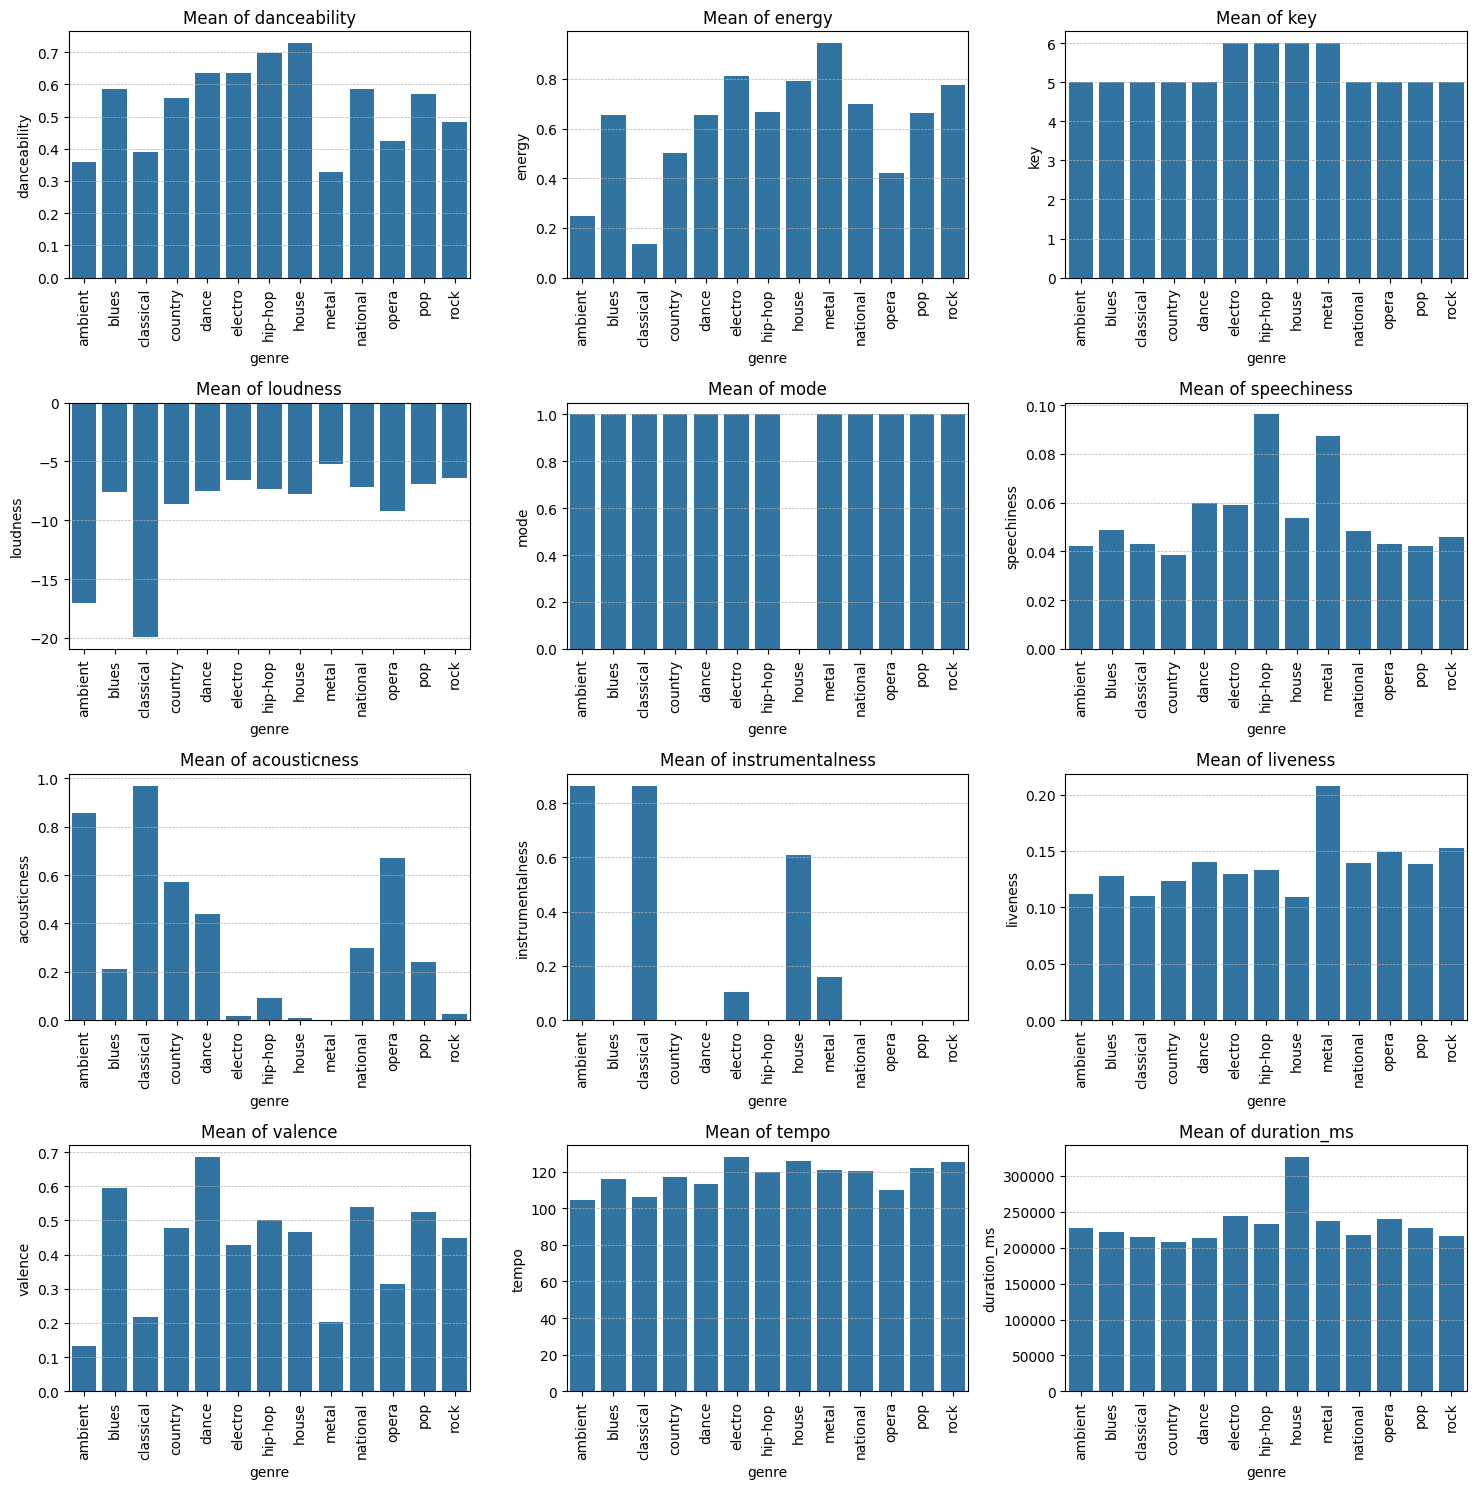

<ipython-input-10-fea099457aac>:20: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=90)


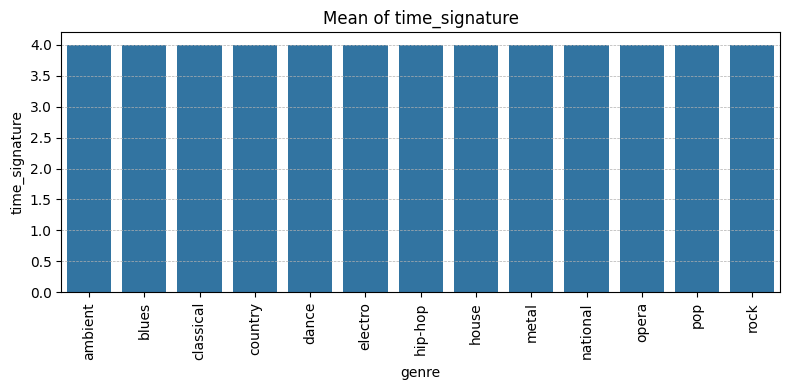

In [ ]:
filtered_data_for_median = filtered_data.drop(["artist_name", "track_name", "track_id", "popularity", "year"], axis=1)
genre_medians = filtered_data_for_median.groupby('genre').median()
genre_medians
cols = genre_medians.columns
fig, axes = plt.subplots(4, 3, figsize=(15, 15))
axes = axes.flatten()

for i in range(12):
    sns.barplot(x=genre_medians.index, y=genre_medians[cols[i]], ax=axes[i])
    axes[i].set_title(f'Mean of {cols[i]}')
    axes[i].set_xticklabels(axes[i].get_xticklabels(), rotation=90)
    axes[i].grid(True, which='major', axis='y', linestyle='--', linewidth=0.5)

plt.tight_layout()
plt.show()

fig, ax = plt.subplots(1, 1, figsize=(8, 4))
sns.barplot(x=genre_medians.index, y=genre_medians[cols[-1]], ax=ax)
ax.set_title(f'Mean of {cols[-1]}')
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
ax.grid(True, which='major', axis='y', linestyle='--', linewidth=0.5)
plt.tight_layout()
plt.show()